In [1]:
import h5py

/net/lofar1/data1/albert/miniconda3/envs/kerastf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
with h5py.File('../../scripts/data/killms_datapack_2.hdf5') as f, h5py.File('../../scripts/data/killms_datapack_3.hdf5') as g:
    g['/sol000/tec000/val'][...] = f['/sol000/tec000/val'][...]
    g['/sol000/tec000/weight'][...] = f['/sol000/tec000/weight'][...]

In [1]:
from bayes_tec.bayes_opt.maximum_likelihood_tec import solve_ml_tec
from bayes_tec.datapack import DataPack
import numpy as np

/net/lofar1/data1/albert/miniconda3/envs/kerastf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [46]:
with DataPack('../../scripts/data/killms_datapack_2.hdf5',readonly=True) as datapack:#'/home/albert/git/IonoTomo/src/ionotomo/data/NsolutionsDDE_2.5Jy_tecandphasePF_correctedlosoto_fulltime_dec27.h5',readonly=True) as datapack:
    datapack.switch_solset('posterior_sol')
    datapack.select(ant="RS*",time=slice(1,1000,1),pol=slice(0,1,1))
    tec, _ = datapack.tec
    datapack.switch_solset('sol000')
    phase, axes = datapack.phase
    
    tec_ml, _ = datapack.tec
    
    patch_names,directions = datapack.get_sources(axes['dir'])
    _, freqs = datapack.get_freqs(axes['freq'])
    _, times = datapack.get_times(axes['time'])
print(axes)
Nf = len(freqs)
Nt = len(times)
# phase_ = phase.transpose((0,1,2,4,3)).reshape((-1,Nf))
# tec_, sigma_ = solve_ml_tec(phase_,freqs,batch_size=int(1e6),max_tec=0.6,n_iter=30,K=3,t=2.)

2018-09-24 10:33:16,721 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-09-24 10:33:16,735 Closing table.
2018-09-24 10:33:16,741 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-09-24 10:33:18,341 Closing table.
{'pol': array(['XX'], dtype='<U2'), 'dir': array(['Dir00', 'Dir01', 'Dir02', 'Dir03', 'Dir04', 'Dir05', 'Dir06',
       'Dir07', 'Dir08', 'Dir09', 'Dir10', 'Dir11', 'Dir12', 'Dir13',
       'Dir14', 'Dir15', 'Dir16', 'Dir17', 'Dir18', 'Dir19', 'Dir20',
       'Dir21', 'Dir22', 'Dir23', 'Dir24', 'Dir25', 'Dir26', 'Dir27',
       'Dir28', 'Dir29', 'Dir30', 'Dir31', 'Dir32', 'Dir33', 'Dir34',
       'Dir35', 'Dir36', 'Dir37', 'Dir38', 'Dir39', 'Dir40', 'Dir41',
       'Dir42', 'Dir43', 'Dir44'], dtype='<U5'), 'ant': array(['RS106HBA', 'RS205HBA', 'RS208HBA', 'RS210HBA', 'RS305HBA',
       'RS306HBA', 'RS307HBA', 'RS310HBA', 'RS406HBA', 'RS407HBA',
       'RS409HBA', 'RS503HBA', 'RS508HBA', 

In [47]:
Npol,Nd, Na,Nf,Nt = phase.shape
# tec = tec_.reshape((Npol,Nd,Na,Nt))
# sigma = sigma_.reshape((Npol, Nd, Na, Nt))

def wrap(phi):
    return np.angle(np.exp(1j*phi))

# phase_pred = -8.448e9*tec[...,None,:]/freqs[:,None]
# res = (wrap(wrap(phase) - wrap(phase_pred)))
res = tec - tec_ml

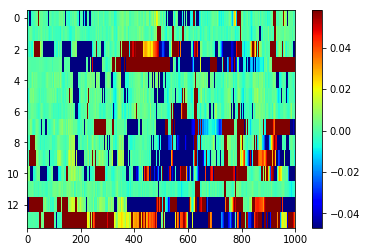

In [48]:
import numpy as np
import pylab as plt

import mpl_toolkits.mplot3d.axes3d as p3







# for l in range(Nt):
    
#     z = phase_pred[0,0,51,:,l]
#     x = times[l].mjd*np.ones(Nf)
#     y = freqs
# #     ax.scatter(x,y,z,c=plt.cm.jet(l/30),marker='+',alpha=0.5)
#     ax.plot(x,y,z,c='k',alpha=0.5)
#     ax.set_xlabel('times (mjd)')
#     ax.set_ylabel('frequency Hz')
#     ax.set_zlabel('phase (rad)')
# #     ax.set_zlim3d([-np.pi,np.pi])

# norm = plt.Normalize(res[0,0,51,:,:].min(),res[0,0,51,:,:].max())
norm = plt.Normalize(np.percentile(res,10),np.percentile(res,90))

c = plt.cm.jet(norm(res[0,0,:,:]))
plt.imshow(res[0,0,:,:], cmap=plt.cm.jet,norm=norm,aspect='auto')
plt.colorbar()
plt.show()

# fig = plt.figure(figsize=(12,12))
# ax = p3.Axes3D(fig)

    
# for l in range(Nf):
#     z = res[0,0,51,l,:]
#     x = times.mjd
#     y = freqs[l]*np.ones(Nt)
#     ax.plot(x,y,z,c='k',marker='+',alpha=0.9)
#     c = plt.cm.jet(norm(z))    
#     ax.scatter(x,y,z,c=c,alpha=0.5)
    
#     ax.set_xlabel('times (mjd)')
#     ax.set_ylabel('frequency Hz')
#     ax.set_zlabel('phase (rad)')
#     ax.set_zlim3d([-np.pi,np.pi])
# plt.show()
# plt.hist(res.flatten(),bins=100)
# plt.show()

In [1]:
from bayes_tec.datapack import DataPack
import numpy as np
import pylab as plt
plt.style.use('ggplot')
import os
        
def plot_solution_residuals(datapack, output_folder, data_solset='sol000', solution_solset='posterior_sol', 
                          ant_sel=None,time_sel=None,dir_sel=None,freq_sel=None,pol_sel=None):
    def _wrap(phi):
        return np.angle(np.exp(1j*phi))
    
    if not isinstance(datapack,str):
        datapack = datapack.filename

    output_folder = os.path.abspath(output_folder)
    os.makedirs(output_folder,exist_ok=True)

    solsets = [data_solset, solution_solset]
    with DataPack(datapack,readonly=True) as datapack:
        datapack.switch_solset(data_solset)
        datapack.select(ant=ant_sel,time=time_sel,dir=dir_sel,freq=freq_sel,pol=pol_sel)
        
        phase,axes = datapack.phase
        timestamps,times = datapack.get_times(axes['time'])
        antenna_labels, antennas = datapack.get_antennas(axes['ant'])
        patch_names, directions = datapack.get_sources(axes['dir'])
        _,freqs = datapack.get_freqs(axes['freq'])
        pols, _ = datapack.get_pols(axes['pol'])
        Npol,Nd,Na,Nf,Nt = phase.shape

        datapack.switch_solset(solution_solset)
        datapack.select(ant=ant_sel,time=time_sel,dir=dir_sel,freq=freq_sel,pol=pol_sel)
        tec,_ = datapack.tec
        phase_pred = -8.448e9*tec[...,None,:]/freqs[:,None]
        
        res = _wrap(_wrap(phase) - _wrap(phase_pred))
        cbar = None  
                
        for p in range(Npol):
            for a in range(Na):
                
                M = int(np.ceil(np.sqrt(Nd)))
                fig,axs = plt.subplots(nrows=2*M,ncols=M,sharex=True,figsize=(M*4,1*M*4),gridspec_kw = {'height_ratios':[1.5,1]*M})
                fig.subplots_adjust(wspace=0., hspace=0.)
                fig.subplots_adjust(right=0.85)
                cbar_ax = fig.add_axes([0.875, 0.15, 0.025, 0.7])
                
                vmin = -1.
                vmax = 1.
                norm = plt.Normalize(vmin, vmax)
                
                for row in range(0,2*M,2):
                    for col in range(M):
                        ax1 = axs[row][col]
                        ax2 = axs[row+1][col]
                        
                        d = col + row//2*M
                        if d >= Nd:
                            continue

                        img = ax1.imshow(res[p,d,a,:,:],origin='lower',aspect='auto',
                                  extent=(times[0].mjd*86400.,times[-1].mjd*86400.,freqs[0],freqs[-1]),
                                 cmap=plt.cm.jet, norm = norm)
                        ax1.text(0.05, 0.95, axes['dir'][d], horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes,backgroundcolor=(1.,1.,1., 0.5))
                    
                        ax1.set_ylabel('frequency [Hz]')
                        ax1.legend()
                    

                        mean = res[p,d,a,:,:].mean(0)
                        ax2.plot(times.mjd*86400, mean,label=r'$\mathbb{E}_\nu[\delta\phi]$')
                        std = res[p,d,a,:,:].std(0)
                        ax2.fill_between(times.mjd*86400, mean - std, mean + std,alpha=0.5,label=r'$\pm\sigma_{\delta\phi}$')
                        ax2.set_xlabel('Time [mjs]')
                        ax2.set_xlim(times[0].mjd*86400.,times[-1].mjd*86400.)
                        ax2.set_ylim(-np.pi,np.pi)
#                         ax2.legend()
                        
                    
                fig.colorbar(img, cax=cbar_ax, orientation='vertical', label='phase dev. [rad]')
                filename = "{}_v_{}_{}_{}.png".format(data_solset,solution_solset, axes['ant'][a], axes['pol'][p])
                plt.savefig(os.path.join(output_folder,filename))
                plt.close('all')
                    
#                     plt.show()
        

In [2]:
plot_solution_residuals('../../scripts/data/killms_datapack_2.hdf5','output_folder_sol000',solution_solset='sol000',ant_sel='RS*',time_sel=slice(1,1000,1),pol_sel=slice(0,1,1),dir_sel=slice(0,None,1))

2018-10-01 11:34:04,183 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-01 11:34:04,199 Closing table.
2018-10-01 11:34:04,202 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-01 11:37:11,393 Closing table.


In [1]:
from bayes_tec.plotting.plot_datapack import animate_datapack

/net/lofar1/data1/albert/miniconda3/envs/kerastf/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [4]:
animate_datapack('../../scripts/data/killms_datapack_2.hdf5','figs_opt_first',num_processes=32,ant_sel='RS*',time_sel=slice(0,3600,1),observable='tec', tec_eval_freq=140e6, plot_facet_idx=True, labels_in_radec=True, solset='posterior_sol_opt',phase_wrap=True)

2018-10-09 17:47:31,496 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-09 17:47:31,499 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-09 17:47:31,500 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-09 17:47:31,500 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-09 17:47:31,499 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-09 17:47:31,500 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-09 17:47:31,499 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-09 17:47:31,500 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-09 17:47:31,503 Appending to /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_

2018-10-09 17:47:31,610 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-09 17:47:31,621 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-09 17:47:31,636 Closing table.
2018-10-09 17:47:31,636 Closing table.
2018-10-09 17:47:31,637 Closing table.
2018-10-09 17:47:31,639 Closing table.
2018-10-09 17:47:31,638 Closing table.
2018-10-09 17:47:31,642 turning off display
2018-10-09 17:47:31,643 Closing table.
2018-10-09 17:47:31,644 turning off display
2018-10-09 17:47:31,646 turning off display
2018-10-09 17:47:31,644 Closing table.
2018-10-09 17:47:31,646 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-09 17:47:31,646 turning off display
2018-10-09 17:47:31,647 Reading from /net/lofar1/data1/albert/git/bayes_tec/scripts/data/killms_datapack_2.hdf5.
2018-10-09 17:47:31,647 Closing table.
2018-10-09 17:47:31,649 Reading from /net/lofar1/data1/alber

 4.98798478e+09],freq=None,dir=None,pol=None
2018-10-09 17:47:31,695 Applying selection: ant=RS*,time=[4.98795618e+09 4.98795643e+09 4.98795669e+09 4.98795695e+09
 4.98795720e+09 4.98795746e+09 4.98795771e+09 4.98795797e+09
 4.98795823e+09 4.98795848e+09 4.98795874e+09 4.98795899e+09
 4.98795925e+09 4.98795950e+09 4.98795976e+09 4.98796002e+09
 4.98796027e+09 4.98796053e+09 4.98796078e+09 4.98796104e+09
 4.98796130e+09 4.98796155e+09 4.98796181e+09 4.98796206e+09
 4.98796232e+09 4.98796258e+09 4.98796283e+09 4.98796309e+09
 4.98796334e+09 4.98796360e+09 4.98796386e+09 4.98796411e+09
 4.98796437e+09 4.98796462e+09 4.98796488e+09 4.98796514e+09
 4.98796539e+09 4.98796565e+09 4.98796590e+09 4.98796616e+09
 4.98796642e+09 4.98796667e+09 4.98796693e+09 4.98796718e+09
 4.98796744e+09 4.98796770e+09 4.98796795e+09 4.98796821e+09
 4.98796846e+09 4.98796872e+09 4.98796898e+09 4.98796923e+09
 4.98796949e+09 4.98796974e+09 4.98797000e+09 4.98797026e+09
 4.98797051e+09 4.98797077e+09 4.98797102e+0

 4.98798474e+09],freq=None,dir=None,pol=None
2018-10-09 17:47:31,705 Applying selection: ant=RS*,time=[4.98795615e+09 4.98795641e+09 4.98795667e+09 4.98795692e+09
 4.98795718e+09 4.98795743e+09 4.98795769e+09 4.98795795e+09
 4.98795820e+09 4.98795846e+09 4.98795871e+09 4.98795897e+09
 4.98795922e+09 4.98795948e+09 4.98795974e+09 4.98795999e+09
 4.98796025e+09 4.98796050e+09 4.98796076e+09 4.98796102e+09
 4.98796127e+09 4.98796153e+09 4.98796178e+09 4.98796204e+09
 4.98796230e+09 4.98796255e+09 4.98796281e+09 4.98796306e+09
 4.98796332e+09 4.98796358e+09 4.98796383e+09 4.98796409e+09
 4.98796434e+09 4.98796460e+09 4.98796486e+09 4.98796511e+09
 4.98796537e+09 4.98796562e+09 4.98796588e+09 4.98796614e+09
 4.98796639e+09 4.98796665e+09 4.98796690e+09 4.98796716e+09
 4.98796742e+09 4.98796767e+09 4.98796793e+09 4.98796818e+09
 4.98796844e+09 4.98796870e+09 4.98796895e+09 4.98796921e+09
 4.98796946e+09 4.98796972e+09 4.98796998e+09 4.98797023e+09
 4.98797049e+09 4.98797074e+09 4.98797100e+0

 4.98798392e+09 4.98798418e+09 4.98798443e+09 4.98798469e+09],freq=None,dir=None,pol=None
2018-10-09 17:47:31,714 Applying selection: ant=RS*,time=[4.98795613e+09 4.98795639e+09 4.98795664e+09 4.98795690e+09
 4.98795715e+09 4.98795741e+09 4.98795767e+09 4.98795792e+09
 4.98795818e+09 4.98795843e+09 4.98795869e+09 4.98795894e+09
 4.98795920e+09 4.98795946e+09 4.98795971e+09 4.98795997e+09
 4.98796022e+09 4.98796048e+09 4.98796074e+09 4.98796099e+09
 4.98796125e+09 4.98796150e+09 4.98796176e+09 4.98796202e+09
 4.98796227e+09 4.98796253e+09 4.98796278e+09 4.98796304e+09
 4.98796330e+09 4.98796355e+09 4.98796381e+09 4.98796406e+09
 4.98796432e+09 4.98796458e+09 4.98796483e+09 4.98796509e+09
 4.98796534e+09 4.98796560e+09 4.98796586e+09 4.98796611e+09
 4.98796637e+09 4.98796662e+09 4.98796688e+09 4.98796714e+09
 4.98796739e+09 4.98796765e+09 4.98796790e+09 4.98796816e+09
 4.98796842e+09 4.98796867e+09 4.98796893e+09 4.98796918e+09
 4.98796944e+09 4.98796970e+09 4.98796995e+09 4.98797021e+09

 4.98798477e+09],freq=None,dir=None,pol=None
2018-10-09 17:47:31,719 Applying selection: ant=RS*,time=[4.98795607e+09 4.98795633e+09 4.98795659e+09 4.98795684e+09
 4.98795710e+09 4.98795735e+09 4.98795761e+09 4.98795787e+09
 4.98795812e+09 4.98795838e+09 4.98795863e+09 4.98795889e+09
 4.98795914e+09 4.98795940e+09 4.98795966e+09 4.98795991e+09
 4.98796017e+09 4.98796042e+09 4.98796068e+09 4.98796094e+09
 4.98796119e+09 4.98796145e+09 4.98796170e+09 4.98796196e+09
 4.98796222e+09 4.98796247e+09 4.98796273e+09 4.98796298e+09
 4.98796324e+09 4.98796350e+09 4.98796375e+09 4.98796401e+09
 4.98796426e+09 4.98796452e+09 4.98796478e+09 4.98796503e+09
 4.98796529e+09 4.98796554e+09 4.98796580e+09 4.98796606e+09
 4.98796631e+09 4.98796657e+09 4.98796682e+09 4.98796708e+09
 4.98796734e+09 4.98796759e+09 4.98796785e+09 4.98796810e+09
 4.98796836e+09 4.98796862e+09 4.98796887e+09 4.98796913e+09
 4.98796938e+09 4.98796964e+09 4.98796990e+09 4.98797015e+09
 4.98797041e+09 4.98797066e+09 4.98797092e+0

 4.98798386e+09 4.98798411e+09 4.98798437e+09 4.98798462e+09],freq=None,dir=None,pol=None2018-10-09 17:47:31,722 Applying selection: ant=RS*,time=[4.98795619e+09 4.98795644e+09 4.98795670e+09 4.98795695e+09
 4.98795721e+09 4.98795747e+09 4.98795772e+09 4.98795798e+09
 4.98795823e+09 4.98795849e+09 4.98795874e+09 4.98795900e+09
 4.98795926e+09 4.98795951e+09 4.98795977e+09 4.98796002e+09
 4.98796028e+09 4.98796054e+09 4.98796079e+09 4.98796105e+09
 4.98796130e+09 4.98796156e+09 4.98796182e+09 4.98796207e+09
 4.98796233e+09 4.98796258e+09 4.98796284e+09 4.98796310e+09
 4.98796335e+09 4.98796361e+09 4.98796386e+09 4.98796412e+09
 4.98796438e+09 4.98796463e+09 4.98796489e+09 4.98796514e+09
 4.98796540e+09 4.98796566e+09 4.98796591e+09 4.98796617e+09
 4.98796642e+09 4.98796668e+09 4.98796694e+09 4.98796719e+09
 4.98796745e+09 4.98796770e+09 4.98796796e+09 4.98796822e+09
 4.98796847e+09 4.98796873e+09 4.98796898e+09 4.98796924e+09
 4.98796950e+09 4.98796975e+09 4.98797001e+09 4.98797026e+09


 4.98798478e+09],freq=None,dir=None,pol=None2018-10-09 17:47:31,735 Applying selection: ant=RS*,time=[4.98795623e+09 4.98795648e+09 4.98795674e+09 4.98795699e+09
 4.98795725e+09 4.98795751e+09 4.98795776e+09 4.98795802e+09
 4.98795827e+09 4.98795853e+09 4.98795878e+09 4.98795904e+09
 4.98795930e+09 4.98795955e+09 4.98795981e+09 4.98796006e+09
 4.98796032e+09 4.98796058e+09 4.98796083e+09 4.98796109e+09
 4.98796134e+09 4.98796160e+09 4.98796186e+09 4.98796211e+09
 4.98796237e+09 4.98796262e+09 4.98796288e+09 4.98796314e+09
 4.98796339e+09 4.98796365e+09 4.98796390e+09 4.98796416e+09
 4.98796442e+09 4.98796467e+09 4.98796493e+09 4.98796518e+09
 4.98796544e+09 4.98796570e+09 4.98796595e+09 4.98796621e+09
 4.98796646e+09 4.98796672e+09 4.98796698e+09 4.98796723e+09
 4.98796749e+09 4.98796774e+09 4.98796800e+09 4.98796826e+09
 4.98796851e+09 4.98796877e+09 4.98796902e+09 4.98796928e+09
 4.98796954e+09 4.98796979e+09 4.98797005e+09 4.98797030e+09
 4.98797056e+09 4.98797082e+09 4.98797107e+09

 4.98798476e+09],freq=None,dir=None,pol=None2018-10-09 17:47:31,760 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], [9, 41, 73, 105, 137, 169, 201, 233, 265, 297, 329, 361, 393, 425, 457, 489, 521, 553, 585, 617, 649, 681, 713, 745, 777, 809, 841, 873, 905, 937, 969, 1001, 1033, 1065, 1097, 1129, 1161, 1193, 1225, 1257, 1289, 1321, 1353, 1385, 1417, 1449, 1481, 1513, 1545, 1577, 1609, 1641, 1673, 1705, 1737, 1769, 1801, 1833, 1865, 1897, 1929, 1961, 1993, 2025, 2057, 2089, 2121, 2153, 2185, 2217, 2249, 2281, 2313, 2345, 2377, 2409, 2441, 2473, 2505, 2537, 2569, 2601, 2633, 2665, 2697, 2729, 2761, 2793, 2825, 2857, 2889, 2921, 2953, 2985, 3017, 3049, 3081, 3113, 3145, 3177, 3209, 3241, 3273, 3305, 3337, 3369, 3401, 3433, 3465, 3497, 3529, 3561, 3593]]

2018-10-09 17:47:31,777 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,

2018-10-09 17:47:31,803 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], [1, 33, 65, 97, 129, 161, 193, 225, 257, 289, 321, 353, 385, 417, 449, 481, 513, 545, 577, 609, 641, 673, 705, 737, 769, 801, 833, 865, 897, 929, 961, 993, 1025, 1057, 1089, 1121, 1153, 1185, 1217, 1249, 1281, 1313, 1345, 1377, 1409, 1441, 1473, 1505, 1537, 1569, 1601, 1633, 1665, 1697, 1729, 1761, 1793, 1825, 1857, 1889, 1921, 1953, 1985, 2017, 2049, 2081, 2113, 2145, 2177, 2209, 2241, 2273, 2305, 2337, 2369, 2401, 2433, 2465, 2497, 2529, 2561, 2593, 2625, 2657, 2689, 2721, 2753, 2785, 2817, 2849, 2881, 2913, 2945, 2977, 3009, 3041, 3073, 3105, 3137, 3169, 3201, 3233, 3265, 3297, 3329, 3361, 3393, 3425, 3457, 3489, 3521, 3553, 3585]]
2018-10-09 17:47:31,803 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], [6, 38, 70, 102, 134, 166, 198, 2

2018-10-09 17:47:31,823 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], [12, 44, 76, 108, 140, 172, 204, 236, 268, 300, 332, 364, 396, 428, 460, 492, 524, 556, 588, 620, 652, 684, 716, 748, 780, 812, 844, 876, 908, 940, 972, 1004, 1036, 1068, 1100, 1132, 1164, 1196, 1228, 1260, 1292, 1324, 1356, 1388, 1420, 1452, 1484, 1516, 1548, 1580, 1612, 1644, 1676, 1708, 1740, 1772, 1804, 1836, 1868, 1900, 1932, 1964, 1996, 2028, 2060, 2092, 2124, 2156, 2188, 2220, 2252, 2284, 2316, 2348, 2380, 2412, 2444, 2476, 2508, 2540, 2572, 2604, 2636, 2668, 2700, 2732, 2764, 2796, 2828, 2860, 2892, 2924, 2956, 2988, 3020, 3052, 3084, 3116, 3148, 3180, 3212, 3244, 3276, 3308, 3340, 3372, 3404, 3436, 3468, 3500, 3532, 3564, 3596]]
2018-10-09 17:47:31,828 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], [16, 48, 80, 112, 144, 176, 20

2018-10-09 17:47:31,955 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [0], [18, 50, 82, 114, 146, 178, 210, 242, 274, 306, 338, 370, 402, 434, 466, 498, 530, 562, 594, 626, 658, 690, 722, 754, 786, 818, 850, 882, 914, 946, 978, 1010, 1042, 1074, 1106, 1138, 1170, 1202, 1234, 1266, 1298, 1330, 1362, 1394, 1426, 1458, 1490, 1522, 1554, 1586, 1618, 1650, 1682, 1714, 1746, 1778, 1810, 1842, 1874, 1906, 1938, 1970, 2002, 2034, 2066, 2098, 2130, 2162, 2194, 2226, 2258, 2290, 2322, 2354, 2386, 2418, 2450, 2482, 2514, 2546, 2578, 2610, 2642, 2674, 2706, 2738, 2770, 2802, 2834, 2866, 2898, 2930, 2962, 2994, 3026, 3058, 3090, 3122, 3154, 3186, 3218, 3250, 3282, 3314, 3346, 3378, 3410, 3442, 3474, 3506, 3538, 3570]]
2018-10-09 17:47:31,958 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [0], [29, 61, 93, 125, 157, 189, 221, 253, 285, 317, 349, 381, 413, 445, 477, 509, 541, 573, 605, 637, 669, 701, 733, 765, 797, 829, 861, 893, 925,

2018-10-09 17:47:32,015 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [0], [24, 56, 88, 120, 152, 184, 216, 248, 280, 312, 344, 376, 408, 440, 472, 504, 536, 568, 600, 632, 664, 696, 728, 760, 792, 824, 856, 888, 920, 952, 984, 1016, 1048, 1080, 1112, 1144, 1176, 1208, 1240, 1272, 1304, 1336, 1368, 1400, 1432, 1464, 1496, 1528, 1560, 1592, 1624, 1656, 1688, 1720, 1752, 1784, 1816, 1848, 1880, 1912, 1944, 1976, 2008, 2040, 2072, 2104, 2136, 2168, 2200, 2232, 2264, 2296, 2328, 2360, 2392, 2424, 2456, 2488, 2520, 2552, 2584, 2616, 2648, 2680, 2712, 2744, 2776, 2808, 2840, 2872, 2904, 2936, 2968, 3000, 3032, 3064, 3096, 3128, 3160, 3192, 3224, 3256, 3288, 3320, 3352, 3384, 3416, 3448, 3480, 3512, 3544, 3576]]
2018-10-09 17:47:32,016 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [0], [0, 32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384, 416, 448, 480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800, 832, 864, 896, 9

2018-10-09 17:47:32,103 Plotting 45 directions
2018-10-09 17:47:32,106 Plotting 14 antennas
2018-10-09 17:47:32,107 Plotting 112 timestamps
2018-10-09 17:47:32,111 Plotting 45 directions
2018-10-09 17:47:32,110 Plotting 45 directions
2018-10-09 17:47:32,114 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [0], [20, 52, 84, 116, 148, 180, 212, 244, 276, 308, 340, 372, 404, 436, 468, 500, 532, 564, 596, 628, 660, 692, 724, 756, 788, 820, 852, 884, 916, 948, 980, 1012, 1044, 1076, 1108, 1140, 1172, 1204, 1236, 1268, 1300, 1332, 1364, 1396, 1428, 1460, 1492, 1524, 1556, 1588, 1620, 1652, 1684, 1716, 1748, 1780, 1812, 1844, 1876, 1908, 1940, 1972, 2004, 2036, 2068, 2100, 2132, 2164, 2196, 2228, 2260, 2292, 2324, 2356, 2388, 2420, 2452, 2484, 2516, 2548, 2580, 2612, 2644, 2676, 2708, 2740, 2772, 2804, 2836, 2868, 2900, 2932, 2964, 2996, 3028, 3060, 3092, 3124, 3156, 3188, 3220, 3252, 3284, 3316, 3348, 3380, 3412, 3444, 3476, 3508, 3540, 3572]]
2018-10-09 17:47:

2018-10-09 17:47:32,234 Plotting 45 directions
2018-10-09 17:47:32,237 Plotting 14 antennas
2018-10-09 17:47:32,239 Plotting 113 timestamps
2018-10-09 17:47:32,250 Closing table.
2018-10-09 17:47:32,273 Plotting 45 directions
2018-10-09 17:47:32,276 Plotting 14 antennas
2018-10-09 17:47:32,275 Optimizing selection reading [slice(None, None, None), slice(None, None, None), [0], [21, 53, 85, 117, 149, 181, 213, 245, 277, 309, 341, 373, 405, 437, 469, 501, 533, 565, 597, 629, 661, 693, 725, 757, 789, 821, 853, 885, 917, 949, 981, 1013, 1045, 1077, 1109, 1141, 1173, 1205, 1237, 1269, 1301, 1333, 1365, 1397, 1429, 1461, 1493, 1525, 1557, 1589, 1621, 1653, 1685, 1717, 1749, 1781, 1813, 1845, 1877, 1909, 1941, 1973, 2005, 2037, 2069, 2101, 2133, 2165, 2197, 2229, 2261, 2293, 2325, 2357, 2389, 2421, 2453, 2485, 2517, 2549, 2581, 2613, 2645, 2677, 2709, 2741, 2773, 2805, 2837, 2869, 2901, 2933, 2965, 2997, 3029, 3061, 3093, 3125, 3157, 3189, 3221, 3253, 3285, 3317, 3349, 3381, 3413, 3445, 3477,

2018-10-09 17:47:54,632 Plotting 2016-12-08T23:30:33.004
2018-10-09 17:47:54,830 Plotting 2016-12-08T23:29:21.004
2018-10-09 17:47:54,874 Plotting 2016-12-08T23:30:09.004
2018-10-09 17:47:55,074 Plotting 2016-12-08T23:29:05.004
2018-10-09 17:47:55,333 Plotting 2016-12-08T23:29:37.004
2018-10-09 17:47:55,535 Plotting 2016-12-08T23:30:01.004
2018-10-09 17:47:59,233 Plotting 2016-12-08T23:35:45.003
2018-10-09 17:47:59,733 Plotting 2016-12-08T23:36:57.003
2018-10-09 17:48:00,069 Plotting 2016-12-08T23:36:17.003
2018-10-09 17:48:00,285 Plotting 2016-12-08T23:37:29.003
2018-10-09 17:48:00,353 Plotting 2016-12-08T23:36:49.003
2018-10-09 17:48:00,757 Plotting 2016-12-08T23:37:05.003
2018-10-09 17:48:00,766 Plotting 2016-12-08T23:36:41.003
2018-10-09 17:48:00,855 Plotting 2016-12-08T23:37:21.003
2018-10-09 17:48:01,245 Plotting 2016-12-08T23:35:13.003
2018-10-09 17:48:01,700 Plotting 2016-12-08T23:36:09.003
2018-10-09 17:48:01,764 Plotting 2016-12-08T23:34:57.003
2018-10-09 17:48:01,961 Plottin

2018-10-09 17:48:32,999 Plotting 2016-12-08T23:52:01.001
2018-10-09 17:48:33,235 Plotting 2016-12-08T23:52:09.001
2018-10-09 17:48:33,581 Plotting 2016-12-08T23:54:17.000
2018-10-09 17:48:33,590 Plotting 2016-12-08T23:52:41.001
2018-10-09 17:48:33,616 Plotting 2016-12-08T23:53:13.001
2018-10-09 17:48:33,722 Plotting 2016-12-08T23:52:57.001
2018-10-09 17:48:34,072 Plotting 2016-12-08T23:52:25.001
2018-10-09 17:48:34,160 Plotting 2016-12-08T23:53:53.001
2018-10-09 17:48:34,301 Plotting 2016-12-08T23:51:37.001
2018-10-09 17:48:34,383 Plotting 2016-12-08T23:51:45.001
2018-10-09 17:48:34,474 Plotting 2016-12-08T23:50:41.001
2018-10-09 17:48:35,159 Plotting 2016-12-08T23:50:57.001
2018-10-09 17:48:35,431 Plotting 2016-12-08T23:52:33.001
2018-10-09 17:48:35,488 Plotting 2016-12-08T23:51:05.001
2018-10-09 17:48:35,616 Plotting 2016-12-08T23:51:29.001
2018-10-09 17:48:35,644 Plotting 2016-12-08T23:51:53.001
2018-10-09 17:48:35,904 Plotting 2016-12-08T23:53:29.001
2018-10-09 17:48:36,049 Plottin

2018-10-09 17:49:07,398 Plotting 2016-12-09T00:14:08.998
2018-10-09 17:49:07,387 Plotting 2016-12-09T00:10:08.998
2018-10-09 17:49:07,719 Plotting 2016-12-09T00:08:08.998
2018-10-09 17:49:08,076 Plotting 2016-12-09T00:10:32.998
2018-10-09 17:49:08,129 Plotting 2016-12-09T00:15:52.997
2018-10-09 17:49:08,179 Plotting 2016-12-09T00:08:24.998
2018-10-09 17:49:08,215 Plotting 2016-12-09T00:07:36.998
2018-10-09 17:49:08,397 Plotting 2016-12-09T00:13:36.998
2018-10-09 17:49:08,443 Plotting 2016-12-09T00:15:28.997
2018-10-09 17:49:08,685 Plotting 2016-12-09T00:07:28.999
2018-10-09 17:49:08,840 Plotting 2016-12-09T00:15:44.997
2018-10-09 17:49:08,928 Plotting 2016-12-09T00:07:52.998
2018-10-09 17:49:09,638 Plotting 2016-12-09T00:15:04.997
2018-10-09 17:49:09,715 Plotting 2016-12-09T00:15:20.997
2018-10-09 17:49:10,649 Plotting 2016-12-09T00:14:56.997
2018-10-09 17:49:10,691 Plotting 2016-12-09T00:14:00.998
2018-10-09 17:49:11,140 Plotting 2016-12-09T00:13:44.998
2018-10-09 17:49:11,195 Plottin

2018-10-09 17:49:40,926 Plotting 2016-12-09T00:27:36.995
2018-10-09 17:49:41,044 Plotting 2016-12-09T00:30:32.995
2018-10-09 17:49:41,499 Plotting 2016-12-09T00:29:36.995
2018-10-09 17:49:41,648 Plotting 2016-12-09T00:30:48.995
2018-10-09 17:49:42,010 Plotting 2016-12-09T00:30:24.995
2018-10-09 17:49:43,251 Plotting 2016-12-09T00:32:40.995
2018-10-09 17:49:43,424 Plotting 2016-12-09T00:31:36.995
2018-10-09 17:49:43,606 Plotting 2016-12-09T00:29:04.995
2018-10-09 17:49:44,189 Plotting 2016-12-09T00:32:16.995
2018-10-09 17:49:44,366 Plotting 2016-12-09T00:36:00.994
2018-10-09 17:49:44,522 Plotting 2016-12-09T00:30:00.995
2018-10-09 17:49:44,780 Plotting 2016-12-09T00:30:08.995
2018-10-09 17:49:44,977 Plotting 2016-12-09T00:37:12.994
2018-10-09 17:49:45,021 Plotting 2016-12-09T00:30:56.995
2018-10-09 17:49:45,576 Plotting 2016-12-09T00:34:56.994
2018-10-09 17:49:45,722 Plotting 2016-12-09T00:37:04.994
2018-10-09 17:49:45,908 Plotting 2016-12-09T00:30:16.995
2018-10-09 17:49:45,926 Plottin

2018-10-09 17:50:16,986 Plotting 2016-12-09T00:53:44.992
2018-10-09 17:50:17,072 Plotting 2016-12-09T00:47:20.993
2018-10-09 17:50:17,119 Plotting 2016-12-09T00:54:08.992
2018-10-09 17:50:17,274 Plotting 2016-12-09T00:53:28.992
2018-10-09 17:50:17,337 Plotting 2016-12-09T00:52:00.992
2018-10-09 17:50:17,782 Plotting 2016-12-09T00:48:56.992
2018-10-09 17:50:18,140 Plotting 2016-12-09T00:46:24.993
2018-10-09 17:50:18,182 Plotting 2016-12-09T00:52:40.992
2018-10-09 17:50:18,692 Plotting 2016-12-09T00:46:56.993
2018-10-09 17:50:18,965 Plotting 2016-12-09T00:53:20.992
2018-10-09 17:50:18,980 Plotting 2016-12-09T00:46:16.993
2018-10-09 17:50:18,992 Plotting 2016-12-09T00:48:32.992
2018-10-09 17:50:19,498 Plotting 2016-12-09T00:51:52.992
2018-10-09 17:50:19,808 Plotting 2016-12-09T00:51:44.992
2018-10-09 17:50:19,892 Plotting 2016-12-09T00:46:48.993
2018-10-09 17:50:20,010 Plotting 2016-12-09T00:52:08.992
2018-10-09 17:50:20,174 Plotting 2016-12-09T00:52:24.992
2018-10-09 17:50:20,800 Plottin

2018-10-09 17:50:48,215 Plotting 2016-12-09T01:09:28.989
2018-10-09 17:50:48,613 Plotting 2016-12-09T01:10:40.989
2018-10-09 17:50:48,795 Plotting 2016-12-09T01:14:24.988
2018-10-09 17:50:49,471 Plotting 2016-12-09T01:11:04.989
2018-10-09 17:50:49,958 Plotting 2016-12-09T01:15:36.988
2018-10-09 17:50:50,127 Plotting 2016-12-09T01:08:24.989
2018-10-09 17:50:50,270 Plotting 2016-12-09T01:03:04.990
2018-10-09 17:50:50,417 Plotting 2016-12-09T01:03:36.990
2018-10-09 17:50:50,844 Plotting 2016-12-09T01:08:00.989
2018-10-09 17:50:51,094 Plotting 2016-12-09T01:02:56.990
2018-10-09 17:50:51,454 Plotting 2016-12-09T01:10:00.989
2018-10-09 17:50:51,641 Plotting 2016-12-09T01:15:12.988
2018-10-09 17:50:52,014 Plotting 2016-12-09T01:13:20.989
2018-10-09 17:50:52,271 Plotting 2016-12-09T01:10:16.989
2018-10-09 17:50:52,354 Plotting 2016-12-09T01:08:32.989
2018-10-09 17:50:52,456 Plotting 2016-12-09T01:13:52.989
2018-10-09 17:50:52,649 Plotting 2016-12-09T01:14:48.988
2018-10-09 17:50:52,666 Plottin

2018-10-09 17:51:20,027 Plotting 2016-12-09T01:20:40.988
2018-10-09 17:51:20,284 Plotting 2016-12-09T01:25:44.987
2018-10-09 17:51:20,473 Plotting 2016-12-09T01:32:32.986
2018-10-09 17:51:20,506 Plotting 2016-12-09T01:30:56.986
2018-10-09 17:51:20,647 Plotting 2016-12-09T01:26:24.987
2018-10-09 17:51:20,996 Plotting 2016-12-09T01:31:52.986
2018-10-09 17:51:22,625 Plotting 2016-12-09T01:30:32.986
2018-10-09 17:51:22,688 Plotting 2016-12-09T01:32:00.986
2018-10-09 17:51:23,125 Plotting 2016-12-09T01:30:48.986
2018-10-09 17:51:23,236 Plotting 2016-12-09T01:24:32.987
2018-10-09 17:51:23,386 Plotting 2016-12-09T01:24:48.987
2018-10-09 17:51:23,471 Plotting 2016-12-09T01:30:16.986
2018-10-09 17:51:23,653 Plotting 2016-12-09T01:32:24.986
2018-10-09 17:51:23,836 Plotting 2016-12-09T01:36:56.985
2018-10-09 17:51:24,012 Plotting 2016-12-09T01:25:12.987
2018-10-09 17:51:24,134 Plotting 2016-12-09T01:35:44.985
2018-10-09 17:51:24,142 Plotting 2016-12-09T01:26:56.987
2018-10-09 17:51:24,222 Plottin

2018-10-09 17:51:52,308 Plotting 2016-12-09T01:44:00.984
2018-10-09 17:51:52,422 Plotting 2016-12-09T01:41:36.984
2018-10-09 17:51:52,494 Plotting 2016-12-09T01:42:16.984
2018-10-09 17:51:52,489 Plotting 2016-12-09T01:48:48.983
2018-10-09 17:51:53,127 Plotting 2016-12-09T01:46:24.984
2018-10-09 17:51:53,173 Plotting 2016-12-09T01:47:12.984
2018-10-09 17:51:53,195 Plotting 2016-12-09T01:53:36.983
2018-10-09 17:51:53,541 Plotting 2016-12-09T01:41:44.984
2018-10-09 17:51:53,629 Plotting 2016-12-09T01:41:28.984
2018-10-09 17:51:53,675 Plotting 2016-12-09T01:52:24.983
2018-10-09 17:51:54,003 Plotting 2016-12-09T01:42:24.984
2018-10-09 17:51:54,263 Plotting 2016-12-09T01:53:28.983
2018-10-09 17:51:54,362 Plotting 2016-12-09T01:51:44.983
2018-10-09 17:51:54,436 Plotting 2016-12-09T01:46:56.984
2018-10-09 17:51:54,660 Plotting 2016-12-09T01:53:52.983
2018-10-09 17:51:54,944 Plotting 2016-12-09T01:48:40.983
2018-10-09 17:51:55,696 Plotting 2016-12-09T01:47:04.984
2018-10-09 17:51:55,897 Plottin

2018-10-09 17:52:22,804 Plotting 2016-12-09T02:05:44.981
2018-10-09 17:52:23,105 Plotting 2016-12-09T02:10:48.980
2018-10-09 17:52:23,180 Plotting 2016-12-09T02:04:08.981
2018-10-09 17:52:23,275 Plotting 2016-12-09T02:04:48.981
2018-10-09 17:52:23,388 Plotting 2016-12-09T02:09:20.980
2018-10-09 17:52:23,472 Plotting 2016-12-09T01:58:24.982
2018-10-09 17:52:23,569 Plotting 2016-12-09T02:10:16.980
2018-10-09 17:52:24,371 Plotting 2016-12-09T01:59:04.982
2018-10-09 17:52:25,316 Plotting 2016-12-09T02:08:56.980
2018-10-09 17:52:25,523 Plotting 2016-12-09T02:03:12.981
2018-10-09 17:52:25,763 Plotting 2016-12-09T02:15:20.979
2018-10-09 17:52:26,086 Plotting 2016-12-09T02:09:12.980
2018-10-09 17:52:26,380 Plotting 2016-12-09T02:08:08.980
2018-10-09 17:52:26,607 Plotting 2016-12-09T02:14:08.980
2018-10-09 17:52:26,691 Plotting 2016-12-09T02:10:08.980
2018-10-09 17:52:26,749 Plotting 2016-12-09T02:09:44.980
2018-10-09 17:52:26,950 Plotting 2016-12-09T02:08:40.980
2018-10-09 17:52:27,140 Plottin

2018-10-09 17:52:55,140 Plotting 2016-12-09T02:25:12.978
2018-10-09 17:52:55,323 Plotting 2016-12-09T02:31:52.977
2018-10-09 17:52:55,456 Plotting 2016-12-09T02:31:12.977
2018-10-09 17:52:55,530 Plotting 2016-12-09T02:32:00.977
2018-10-09 17:52:55,579 Plotting 2016-12-09T02:32:16.977
2018-10-09 17:52:55,672 Plotting 2016-12-09T02:20:40.979
2018-10-09 17:52:55,742 Plotting 2016-12-09T02:30:48.977
2018-10-09 17:52:56,035 Plotting 2016-12-09T02:24:48.978
2018-10-09 17:52:56,375 Plotting 2016-12-09T02:31:44.977
2018-10-09 17:52:56,487 Plotting 2016-12-09T02:25:20.978
2018-10-09 17:52:56,739 Plotting 2016-12-09T02:30:08.977
2018-10-09 17:52:56,725 Plotting 2016-12-09T02:20:00.979
2018-10-09 17:52:56,950 Plotting 2016-12-09T02:32:08.977
2018-10-09 17:52:57,346 Plotting 2016-12-09T02:25:36.978
2018-10-09 17:52:57,388 Plotting 2016-12-09T02:25:28.978
2018-10-09 17:52:57,668 Plotting 2016-12-09T02:31:36.977
2018-10-09 17:52:57,739 Plotting 2016-12-09T02:30:40.977
2018-10-09 17:52:57,828 Plottin

2018-10-09 17:53:25,406 Plotting 2016-12-09T02:43:12.975
2018-10-09 17:53:25,739 Plotting 2016-12-09T02:47:44.974
2018-10-09 17:53:26,217 Plotting 2016-12-09T02:53:44.974
2018-10-09 17:53:26,492 Plotting 2016-12-09T02:44:08.975
2018-10-09 17:53:26,602 Plotting 2016-12-09T02:36:56.976
2018-10-09 17:53:26,736 Plotting 2016-12-09T02:37:12.976
2018-10-09 17:53:27,072 Plotting 2016-12-09T02:36:48.976
2018-10-09 17:53:27,195 Plotting 2016-12-09T02:37:52.976
2018-10-09 17:53:27,329 Plotting 2016-12-09T02:43:44.975
2018-10-09 17:53:27,765 Plotting 2016-12-09T02:47:36.974
2018-10-09 17:53:27,950 Plotting 2016-12-09T02:47:20.975
2018-10-09 17:53:28,195 Plotting 2016-12-09T02:41:36.975
2018-10-09 17:53:28,207 Plotting 2016-12-09T02:47:04.975
2018-10-09 17:53:28,630 Plotting 2016-12-09T02:48:08.974
2018-10-09 17:53:29,020 Plotting 2016-12-09T02:48:32.974
2018-10-09 17:53:29,269 Plotting 2016-12-09T02:53:36.974
2018-10-09 17:53:29,335 Plotting 2016-12-09T02:53:12.974
2018-10-09 17:53:29,677 Plottin

2018-10-09 17:53:56,964 Plotting 2016-12-09T03:05:36.972
2018-10-09 17:53:57,075 Plotting 2016-12-09T03:10:32.971
2018-10-09 17:53:57,182 Plotting 2016-12-09T02:54:32.973
2018-10-09 17:53:57,236 Plotting 2016-12-09T03:04:00.972
2018-10-09 17:53:57,264 Plotting 2016-12-09T03:09:36.971
2018-10-09 17:53:57,373 Plotting 2016-12-09T03:10:24.971
2018-10-09 17:53:57,478 Plotting 2016-12-09T03:03:36.972
2018-10-09 17:53:57,525 Plotting 2016-12-09T03:10:16.971
2018-10-09 17:53:57,838 Plotting 2016-12-09T03:03:44.972
2018-10-09 17:53:58,739 Plotting 2016-12-09T02:59:04.973
2018-10-09 17:53:58,929 Plotting 2016-12-09T03:08:32.971
2018-10-09 17:53:59,093 Plotting 2016-12-09T03:10:08.971
2018-10-09 17:53:59,134 Plotting 2016-12-09T03:03:52.972
2018-10-09 17:53:59,367 Plotting 2016-12-09T03:09:04.971
2018-10-09 17:53:59,516 Plotting 2016-12-09T03:10:00.971
2018-10-09 17:53:59,759 Plotting 2016-12-09T03:03:12.972
2018-10-09 17:53:59,898 Plotting 2016-12-09T03:04:32.972
2018-10-09 17:54:01,379 Plottin

2018-10-09 17:54:27,742 Plotting 2016-12-09T03:21:36.969
2018-10-09 17:54:28,484 Plotting 2016-12-09T03:15:36.970
2018-10-09 17:54:28,701 Plotting 2016-12-09T03:32:08.968
2018-10-09 17:54:28,947 Plotting 2016-12-09T03:25:28.969
2018-10-09 17:54:29,204 Plotting 2016-12-09T03:26:32.969
2018-10-09 17:54:29,641 Plotting 2016-12-09T03:31:52.968
2018-10-09 17:54:29,813 Plotting 2016-12-09T03:26:00.969
2018-10-09 17:54:30,011 Plotting 2016-12-09T03:22:08.969
2018-10-09 17:54:30,080 Plotting 2016-12-09T03:15:28.970
2018-10-09 17:54:30,481 Plotting 2016-12-09T03:22:32.969
2018-10-09 17:54:30,527 Plotting 2016-12-09T03:25:20.969
2018-10-09 17:54:30,616 Plotting 2016-12-09T03:15:20.970
2018-10-09 17:54:30,680 Plotting 2016-12-09T03:20:00.970
2018-10-09 17:54:30,697 Plotting 2016-12-09T03:16:16.970
2018-10-09 17:54:30,997 Plotting 2016-12-09T03:30:32.968
2018-10-09 17:54:31,009 Plotting 2016-12-09T03:25:44.969
2018-10-09 17:54:31,129 Plotting 2016-12-09T03:15:12.970
2018-10-09 17:54:31,236 Plottin

2018-10-09 17:54:59,433 Plotting 2016-12-09T03:32:24.968
2018-10-09 17:54:59,548 Plotting 2016-12-09T03:33:20.968
2018-10-09 17:54:59,765 Plotting 2016-12-09T03:48:32.965
2018-10-09 17:54:59,845 Plotting 2016-12-09T03:32:16.968
2018-10-09 17:54:59,906 Plotting 2016-12-09T03:48:48.965
2018-10-09 17:54:59,940 Plotting 2016-12-09T03:37:04.967
2018-10-09 17:55:00,383 Plotting 2016-12-09T03:48:24.965
2018-10-09 17:55:00,702 Plotting 2016-12-09T03:42:48.966
2018-10-09 17:55:01,155 Plotting 2016-12-09T03:42:08.966
2018-10-09 17:55:01,220 Plotting 2016-12-09T03:42:16.966
2018-10-09 17:55:01,274 Plotting 2016-12-09T03:32:56.968
2018-10-09 17:55:01,518 Plotting 2016-12-09T03:37:28.967
2018-10-09 17:55:02,115 Plotting 2016-12-09T03:42:56.966
2018-10-09 17:55:02,462 Plotting 2016-12-09T03:53:12.965
2018-10-09 17:55:02,604 Plotting 2016-12-09T03:47:28.966
2018-10-09 17:55:02,584 Plotting 2016-12-09T03:53:28.965
2018-10-09 17:55:02,739 Plotting 2016-12-09T03:46:56.966
2018-10-09 17:55:03,205 Plottin

2018-10-09 17:55:29,920 Plotting 2016-12-09T04:04:56.963
2018-10-09 17:55:30,053 Plotting 2016-12-09T04:00:00.964
2018-10-09 17:55:30,067 Plotting 2016-12-09T03:59:52.964
2018-10-09 17:55:31,175 Plotting 2016-12-09T03:54:00.965
2018-10-09 17:55:31,453 Plotting 2016-12-09T03:58:40.964
2018-10-09 17:55:31,523 Plotting 2016-12-09T03:59:04.964
2018-10-09 17:55:32,449 Plotting 2016-12-09T04:09:20.962
2018-10-09 17:55:32,503 Plotting 2016-12-09T03:53:44.965
2018-10-09 17:55:32,514 Plotting 2016-12-09T04:04:24.963
2018-10-09 17:55:32,561 Plotting 2016-12-09T04:00:56.963
2018-10-09 17:55:32,664 Plotting 2016-12-09T04:03:52.963
2018-10-09 17:55:32,916 Plotting 2016-12-09T04:10:00.962
2018-10-09 17:55:33,067 Plotting 2016-12-09T04:03:44.963
2018-10-09 17:55:33,144 Plotting 2016-12-09T04:09:52.962
2018-10-09 17:55:33,153 Plotting 2016-12-09T04:10:24.962
2018-10-09 17:55:33,154 Plotting 2016-12-09T03:53:36.965
2018-10-09 17:55:33,289 Plotting 2016-12-09T04:05:20.963
2018-10-09 17:55:33,487 Plottin

2018-10-09 17:56:00,556 Plotting 2016-12-09T04:20:56.960
2018-10-09 17:56:00,560 Plotting 2016-12-09T04:27:28.960
2018-10-09 17:56:00,623 Plotting 2016-12-09T04:21:28.960
2018-10-09 17:56:00,621 Plotting 2016-12-09T04:26:24.960
2018-10-09 17:56:00,634 Plotting 2016-12-09T04:11:44.962
2018-10-09 17:56:01,137 Plotting 2016-12-09T04:20:40.961
2018-10-09 17:56:01,477 Plotting 2016-12-09T04:25:52.960
2018-10-09 17:56:01,615 Plotting 2016-12-09T04:31:36.959
2018-10-09 17:56:01,678 Plotting 2016-12-09T04:20:32.961
2018-10-09 17:56:01,984 Plotting 2016-12-09T04:21:52.960
2018-10-09 17:56:02,001 Plotting 2016-12-09T04:10:56.962
2018-10-09 17:56:02,329 Plotting 2016-12-09T04:15:28.961
2018-10-09 17:56:02,483 Plotting 2016-12-09T04:31:52.959
2018-10-09 17:56:03,458 Plotting 2016-12-09T04:11:20.962
2018-10-09 17:56:03,511 Plotting 2016-12-09T04:25:20.960
2018-10-09 17:56:03,658 Plotting 2016-12-09T04:26:16.960
2018-10-09 17:56:03,661 Plotting 2016-12-09T04:21:20.960
2018-10-09 17:56:04,089 Plottin

2018-10-09 17:56:32,010 Plotting 2016-12-09T04:32:56.959
2018-10-09 17:56:32,636 Plotting 2016-12-09T04:38:24.958
2018-10-09 17:56:32,704 Plotting 2016-12-09T04:37:04.958
2018-10-09 17:56:32,889 Plotting 2016-12-09T04:48:32.956
2018-10-09 17:56:33,006 Plotting 2016-12-09T04:48:24.956
2018-10-09 17:56:33,017 Plotting 2016-12-09T04:32:08.959
2018-10-09 17:56:33,790 Plotting 2016-12-09T04:48:16.956
2018-10-09 17:56:34,005 Plotting 2016-12-09T04:37:28.958
2018-10-09 17:56:34,065 Plotting 2016-12-09T04:39:20.958
2018-10-09 17:56:34,058 Plotting 2016-12-09T04:38:16.958
2018-10-09 17:56:34,070 Plotting 2016-12-09T04:32:00.959
2018-10-09 17:56:34,092 Plotting 2016-12-09T04:48:08.956
2018-10-09 17:56:34,118 Plotting 2016-12-09T04:48:48.956
2018-10-09 17:56:34,317 Plotting 2016-12-09T04:42:48.957
2018-10-09 17:56:34,428 Plotting 2016-12-09T04:33:04.959
2018-10-09 17:56:34,453 Plotting 2016-12-09T04:42:08.957
2018-10-09 17:56:34,549 Plotting 2016-12-09T04:42:16.957
2018-10-09 17:56:34,608 Plottin

2018-10-09 17:57:02,699 Plotting 2016-12-09T04:49:04.956
2018-10-09 17:57:02,789 Plotting 2016-12-09T04:55:20.955
2018-10-09 17:57:03,276 Plotting 2016-12-09T05:04:24.954
2018-10-09 17:57:03,287 Plotting 2016-12-09T05:04:16.954
2018-10-09 17:57:03,352 Plotting 2016-12-09T04:59:12.955
2018-10-09 17:57:03,443 Plotting 2016-12-09T04:49:28.956
2018-10-09 17:57:03,859 Plotting 2016-12-09T04:58:56.955
2018-10-09 17:57:04,010 Plotting 2016-12-09T05:04:48.954
2018-10-09 17:57:04,509 Plotting 2016-12-09T05:00:16.955
2018-10-09 17:57:04,619 Plotting 2016-12-09T05:10:16.953
2018-10-09 17:57:04,847 Plotting 2016-12-09T05:04:40.954
2018-10-09 17:57:04,935 Plotting 2016-12-09T04:59:04.955
2018-10-09 17:57:04,973 Plotting 2016-12-09T05:03:44.954
2018-10-09 17:57:05,986 Plotting 2016-12-09T05:09:52.953
2018-10-09 17:57:06,851 Plotting 2016-12-09T04:53:52.956
2018-10-09 17:57:06,898 Plotting 2016-12-09T04:59:44.955
2018-10-09 17:57:07,090 Plotting 2016-12-09T04:49:44.956
2018-10-09 17:57:07,303 Plottin

2018-10-09 17:57:35,712 Plotting 2016-12-09T05:27:12.951
2018-10-09 17:57:35,734 Plotting 2016-12-09T05:26:40.951
2018-10-09 17:57:36,005 Plotting 2016-12-09T05:31:20.950
2018-10-09 17:57:36,005 Plotting 2016-12-09T05:16:48.952
2018-10-09 17:57:36,277 Plotting 2016-12-09T05:06:48.954
2018-10-09 17:57:36,352 Plotting 2016-12-09T05:15:28.952
2018-10-09 17:57:36,555 Plotting 2016-12-09T05:10:56.953
2018-10-09 17:57:36,753 Plotting 2016-12-09T05:26:32.951
2018-10-09 17:57:36,818 Plotting 2016-12-09T05:10:32.953
2018-10-09 17:57:36,813 Plotting 2016-12-09T05:11:20.953
2018-10-09 17:57:37,404 Plotting 2016-12-09T05:06:24.954
2018-10-09 17:57:37,592 Plotting 2016-12-09T05:25:36.951
2018-10-09 17:57:37,706 Plotting 2016-12-09T05:15:52.952
2018-10-09 17:57:37,952 Plotting 2016-12-09T05:21:12.951
2018-10-09 17:57:38,013 Plotting 2016-12-09T05:11:28.953
2018-10-09 17:57:38,041 Plotting 2016-12-09T05:16:40.952
2018-10-09 17:57:38,058 Plotting 2016-12-09T05:22:08.951
2018-10-09 17:57:38,115 Plottin

2018-10-09 17:58:06,120 Plotting 2016-12-09T05:43:12.948
2018-10-09 17:58:06,222 Plotting 2016-12-09T05:27:28.951
2018-10-09 17:58:06,334 Plotting 2016-12-09T05:33:44.950
2018-10-09 17:58:06,341 Plotting 2016-12-09T05:23:28.951
2018-10-09 17:58:06,386 Plotting 2016-12-09T05:28:32.950
2018-10-09 17:58:06,423 Plotting 2016-12-09T05:32:56.950
2018-10-09 17:58:06,607 Plotting 2016-12-09T05:37:36.949
2018-10-09 17:58:07,312 Plotting 2016-12-09T05:48:40.947
2018-10-09 17:58:07,397 Plotting 2016-12-09T05:37:20.949
2018-10-09 17:58:07,718 Plotting 2016-12-09T05:43:04.948
2018-10-09 17:58:07,759 Plotting 2016-12-09T05:42:08.948
2018-10-09 17:58:08,384 Plotting 2016-12-09T05:38:40.949
2018-10-09 17:58:09,244 Plotting 2016-12-09T05:37:28.949
2018-10-09 17:58:09,407 Plotting 2016-12-09T05:27:52.950
2018-10-09 17:58:09,774 Plotting 2016-12-09T05:48:08.947
2018-10-09 17:58:09,793 Plotting 2016-12-09T05:48:32.947
2018-10-09 17:58:09,806 Plotting 2016-12-09T05:52:40.947
2018-10-09 17:58:09,966 Plottin

2018-10-09 17:58:38,952 Plotting 2016-12-09T05:54:32.946
2018-10-09 17:58:39,001 Plotting 2016-12-09T06:04:56.945
2018-10-09 17:58:39,346 Plotting 2016-12-09T05:44:56.948
2018-10-09 17:58:39,981 Plotting 2016-12-09T06:04:00.945
2018-10-09 17:58:40,093 Plotting 2016-12-09T05:56:08.946
2018-10-09 17:58:40,156 Plotting 2016-12-09T05:59:36.946
2018-10-09 17:58:40,366 Plotting 2016-12-09T05:55:12.946
2018-10-09 17:58:40,396 Plotting 2016-12-09T05:48:56.947
2018-10-09 17:58:40,724 Plotting 2016-12-09T05:59:04.946
2018-10-09 17:58:41,186 Plotting 2016-12-09T06:09:36.944
2018-10-09 17:58:41,227 Plotting 2016-12-09T06:00:32.946
2018-10-09 17:58:41,281 Plotting 2016-12-09T05:53:52.947
2018-10-09 17:58:41,385 Plotting 2016-12-09T05:49:44.947
2018-10-09 17:58:41,767 Plotting 2016-12-09T06:04:08.945
2018-10-09 17:58:41,837 Plotting 2016-12-09T05:49:20.947
2018-10-09 17:58:42,058 Plotting 2016-12-09T05:48:48.947
2018-10-09 17:58:42,462 Plotting 2016-12-09T05:45:12.948
2018-10-09 17:58:42,482 Plottin

2018-10-09 17:59:11,839 Plotting 2016-12-09T06:11:20.944
2018-10-09 17:59:11,836 Plotting 2016-12-09T06:21:36.942
2018-10-09 17:59:11,858 Plotting 2016-12-09T06:02:16.945
2018-10-09 17:59:12,034 Plotting 2016-12-09T06:20:32.943
2018-10-09 17:59:12,577 Plotting 2016-12-09T06:16:00.943
2018-10-09 17:59:13,301 Plotting 2016-12-09T06:26:32.942
2018-10-09 17:59:13,472 Plotting 2016-12-09T06:06:56.945
2018-10-09 17:59:13,532 Plotting 2016-12-09T06:17:04.943
2018-10-09 17:59:13,629 Plotting 2016-12-09T06:26:16.942
2018-10-09 17:59:13,726 Plotting 2016-12-09T06:26:24.942
2018-10-09 17:59:13,744 Plotting 2016-12-09T06:12:08.944
2018-10-09 17:59:13,945 Plotting 2016-12-09T06:31:04.941
2018-10-09 17:59:14,143 Plotting 2016-12-09T06:26:56.942
2018-10-09 17:59:14,267 Plotting 2016-12-09T06:15:44.943
2018-10-09 17:59:14,270 Plotting 2016-12-09T06:01:52.945
2018-10-09 17:59:14,800 Plotting 2016-12-09T06:21:28.942
2018-10-09 17:59:16,126 Plotting 2016-12-09T06:06:16.945
2018-10-09 17:59:16,156 Plottin

2018-10-09 17:59:43,629 Plotting 2016-12-09T06:42:24.939
2018-10-09 17:59:43,769 Plotting 2016-12-09T06:44:08.939
2018-10-09 17:59:44,223 Plotting 2016-12-09T06:48:00.938
2018-10-09 17:59:44,251 Plotting 2016-12-09T06:32:56.941
2018-10-09 17:59:44,807 Plotting 2016-12-09T06:23:20.942
2018-10-09 17:59:44,857 Plotting 2016-12-09T06:38:00.940
2018-10-09 17:59:44,901 Plotting 2016-12-09T06:34:32.940
2018-10-09 17:59:45,186 Plotting 2016-12-09T06:37:28.940
2018-10-09 17:59:45,446 Plotting 2016-12-09T06:42:56.939
2018-10-09 17:59:45,490 Plotting 2016-12-09T06:27:12.942
2018-10-09 17:59:45,515 Plotting 2016-12-09T06:38:56.940
2018-10-09 17:59:45,632 Plotting 2016-12-09T06:42:32.939
2018-10-09 17:59:45,725 Plotting 2016-12-09T06:28:08.941
2018-10-09 17:59:45,877 Plotting 2016-12-09T06:33:36.941
2018-10-09 17:59:45,929 Plotting 2016-12-09T06:41:52.939
2018-10-09 17:59:45,996 Plotting 2016-12-09T06:27:20.942
2018-10-09 17:59:46,180 Plotting 2016-12-09T06:32:16.941
2018-10-09 17:59:46,604 Plottin

2018-10-09 18:00:13,475 Plotting 2016-12-09T07:04:40.936
2018-10-09 18:00:13,516 Plotting 2016-12-09T06:40:40.940
2018-10-09 18:00:13,953 Plotting 2016-12-09T07:04:56.936
2018-10-09 18:00:14,441 Plotting 2016-12-09T06:50:32.938
2018-10-09 18:00:14,543 Plotting 2016-12-09T06:49:20.938
2018-10-09 18:00:14,600 Plotting 2016-12-09T06:44:24.939
2018-10-09 18:00:14,711 Plotting 2016-12-09T07:04:48.936
2018-10-09 18:00:14,970 Plotting 2016-12-09T06:54:24.937
2018-10-09 18:00:15,039 Plotting 2016-12-09T06:49:44.938
2018-10-09 18:00:15,153 Plotting 2016-12-09T07:05:20.936
2018-10-09 18:00:15,200 Plotting 2016-12-09T06:44:48.939
2018-10-09 18:00:15,544 Plotting 2016-12-09T06:55:28.937
2018-10-09 18:00:15,745 Plotting 2016-12-09T06:54:08.938
2018-10-09 18:00:17,027 Plotting 2016-12-09T07:03:44.936
2018-10-09 18:00:17,424 Plotting 2016-12-09T06:59:52.937
2018-10-09 18:00:17,595 Plotting 2016-12-09T07:05:28.936
2018-10-09 18:00:17,878 Plotting 2016-12-09T06:40:16.940
2018-10-09 18:00:17,954 Plottin

2018-10-09 18:00:47,100 Plotting 2016-12-09T07:20:16.934
2018-10-09 18:00:47,411 Plotting 2016-12-09T07:12:56.935
2018-10-09 18:00:47,447 Plotting 2016-12-09T07:01:44.936
2018-10-09 18:00:48,495 Plotting 2016-12-09T07:02:00.936
2018-10-09 18:00:48,572 Plotting 2016-12-09T07:15:44.934
2018-10-09 18:00:48,642 Plotting 2016-12-09T07:15:28.934
2018-10-09 18:00:48,876 Plotting 2016-12-09T07:05:44.936
2018-10-09 18:00:49,042 Plotting 2016-12-09T07:10:40.935
2018-10-09 18:00:49,217 Plotting 2016-12-09T07:11:52.935
2018-10-09 18:00:49,416 Plotting 2016-12-09T07:16:48.934
2018-10-09 18:00:49,700 Plotting 2016-12-09T07:11:04.935
2018-10-09 18:00:50,015 Plotting 2016-12-09T07:06:08.936
2018-10-09 18:00:50,215 Plotting 2016-12-09T07:15:36.934
2018-10-09 18:00:51,984 Plotting 2016-12-09T07:06:40.936
2018-10-09 18:00:51,998 Plotting 2016-12-09T07:20:08.934
2018-10-09 18:00:52,324 Plotting 2016-12-09T07:16:16.934
2018-10-09 18:00:52,336 Plotting 2016-12-09T07:01:36.936
2018-10-09 18:00:52,596 Plottin